Topic #1: hitting, yesterday, set, new, lows, highs, hit, stocks, 52, week
Topic #2: revenue, q3, q1, q2, q4, sales, reports, eps, est, vs
Topic #3: scheduled, earnings, 2018, 2017, initiations, gainers, 2019, upgrades, downgrades, benzinga
Topic #4: tuesday, wednesday, update, day, mid, pre, stocks, session, moving, market
Topic #5: coverage, initiates, announces, 00, price, raises, target, maintains, buy, pt


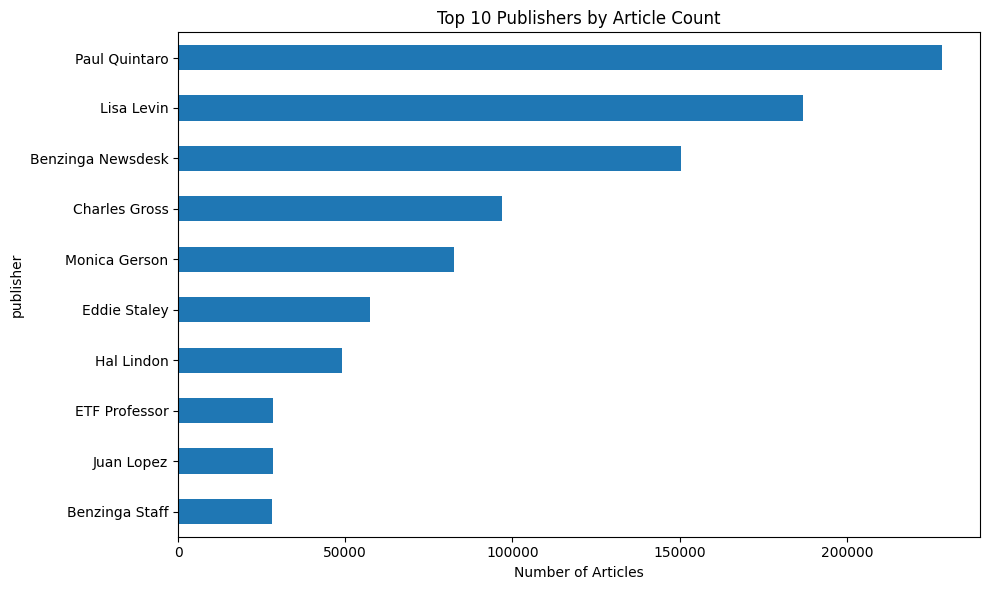

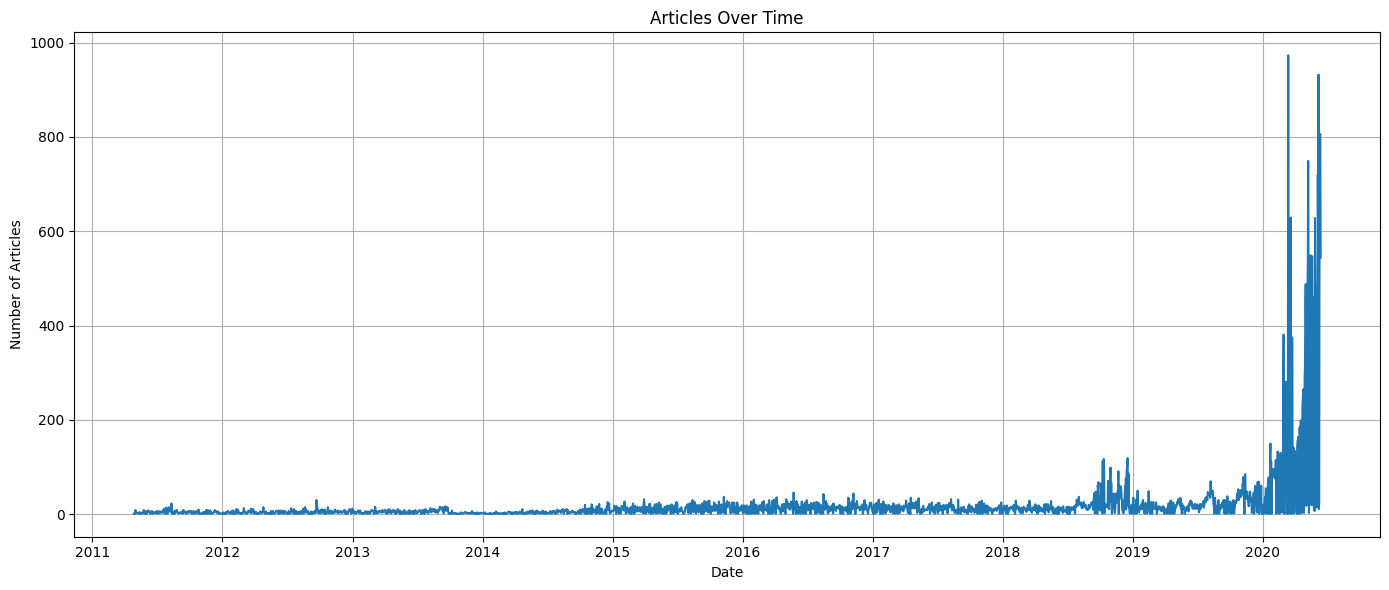

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import datetime as dt
import re

# Load raw analyst ratings/news data
news_df = pd.read_csv("../data/raw_analyst_ratings.csv")

# Clean column names
news_df.columns = news_df.columns.str.strip().str.lower()

# Parse date column
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Headline length
news_df['headline_length'] = news_df['headline'].astype(str).apply(len)

# Publisher frequency
publisher_counts = news_df['publisher'].value_counts()

# Plot: Articles per publisher (Top 10)
plt.figure(figsize=(10,6))
publisher_counts.head(10).plot(kind='barh')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Number of Articles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_publishers.png")

# Plot: Article count over time
articles_by_date = news_df.groupby(news_df['date'].dt.date).size()
plt.figure(figsize=(14,6))
articles_by_date.plot()
plt.title("Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.savefig("articles_over_time.png")

# Keyword extraction using TF-IDF + NMF Topic Modeling
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
x_tfidf = vectorizer.fit_transform(news_df['headline'].astype(str))
n_topics = 5
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_features = nmf_model.fit_transform(x_tfidf)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_keywords = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic #{topic_idx + 1}:", ", ".join(top_keywords))

# Save cleaned version for next step
news_df.to_csv("../data/cleaned_news_data.csv", index=False)

# NEXT: Use technical indicators on TSLA/NVDA price data using TA-Lib  where should i run this?